In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('NYSE.csv')

In [4]:
df.columns

Index(['Company', 'Name', 'Exchange', 'Sector', 'Industry', 'Market Cap',
       'P/E Ratio', 'PEG Ratio', 'Last Trade Price', 'Day Change (%)',
       'Analyst Target Upside', 'Name.1', 'Symbol', 'Beta (5y)', 'Beta (1y)',
       'Quick Ratio', 'Current Ratio', 'Debt to Equity', 'Debt to Assets',
       'Net Debt to Capital'],
      dtype='object')

In [5]:
df.head()

,Company,Name,Exchange,Sector,Industry,Market Cap,P/E Ratio,PEG Ratio,Last Trade Price,Day Change (%),Analyst Target Upside,Name.1,Symbol,Beta (5y),Beta (1y),Quick Ratio,Current Ratio,Debt to Equity,Debt to Assets,Net Debt to Capital
0,PBI,Pitney Bowes,NYSE,Technology,Office Equipment,$1.91B,24.5x,0.22,$11.12,-1.30%,52.9% Upside,Pitney Bowes,PBI,1.26,1.35,0.3x,0.8x,-377.10%,62.50%,43.50%
1,CXM,Sprinklr,NYSE,Technology,Software & IT Services,$1.90B,17.3x,0.10,$7.77,0.40%,15.7% Upside,Sprinklr,CXM,0.78,0.95,1.4x,1.6x,8.90%,4.40%,-21.60%
2,DV,DoubleVerify Holdings,NYSE,Technology,Software & IT Services,$1.85B,35.7x,-5.26,$11.28,-0.40%,63.1% Upside,DoubleVerify Holdings,DV,0.99,1.07,3.9x,4.4x,9.50%,8%,-5.50%
3,FINV,FinVolution Group,NYSE,Technology,Financial Technology (Fintech) & Infrastructure,$1.83B,5.1x,0.15,$7.22,-5.40%,53.5% Upside,FinVolution Group,FINV,0.41,0.62,5x,9.7x,7%,4.40%,-44.70%
4,RAMP,Liveramp,NYSE,Technology,Software & IT Services,$1.80B,142.8x,0.99,$27.41,1.80%,45.9% Upside,Liveramp,RAMP,0.9,1.07,2.7x,2.8x,3.70%,2.80%,-17.90%


In [6]:
df.shape

(152, 20)

In [7]:
df.describe()

,PEG Ratio
count,143.000000
mean,1.382867
std,9.110097
min,-43.290000
25%,-0.730000
50%,0.140000
75%,1.035000
max,52.030000


In [8]:
def clean_ratio(series):
    return (
        series
        .astype(str)
        .str.replace('x', '', regex=False)      # убираем 'x'
        .str.replace('%', '', regex=False)   
        .str.replace(',', '.', regex=False)     # ← запятую на точку
        .replace(['—', 'N/A', '', 'nan'], np.nan)
        .str.strip()
    )

# Применяем clean_ratio
df['P/E Ratio'] = clean_ratio(df['P/E Ratio'])
df['PEG Ratio'] = clean_ratio(df['PEG Ratio'])
df['Debt to Equity'] = clean_ratio(df['Debt to Equity'])
df['Debt to Assets'] = clean_ratio(df['Debt to Assets'])

# Преобразуем в числа
df['P/E Ratio'] = pd.to_numeric(df['P/E Ratio'], errors='coerce')
df['PEG Ratio'] = pd.to_numeric(df['PEG Ratio'], errors='coerce')
df['Debt to Equity'] = pd.to_numeric(df['Debt to Equity'], errors='coerce')
df['Debt to Assets'] = pd.to_numeric(df['Debt to Assets'], errors='coerce')


In [9]:
df.describe()

,P/E Ratio,PEG Ratio,Debt to Equity,Debt to Assets
count,151.000000,143.000000,150.000000,151.000000
mean,9.918079,1.382867,-59.794667,27.339073
std,193.710638,9.110097,597.452574,25.428913
min,-810.500000,-43.290000,-4084.600000,0.000000
25%,-25.450000,-0.730000,3.800000,4.550000
50%,15.600000,0.140000,32.550000,23.500000
75%,33.800000,1.035000,91.950000,38.750000
max,982.900000,52.030000,959.900000,150.400000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company                152 non-null    object 
 1   Name                   152 non-null    object 
 2   Exchange               152 non-null    object 
 3   Sector                 152 non-null    object 
 4   Industry               152 non-null    object 
 5   Market Cap             152 non-null    object 
 6   P/E Ratio              151 non-null    float64
 7   PEG Ratio              143 non-null    float64
 8   Last Trade Price       152 non-null    object 
 9   Day Change (%)         152 non-null    object 
 10  Analyst Target Upside  148 non-null    object 
 11  Name.1                 152 non-null    object 
 12  Symbol                 152 non-null    object 
 13  Beta (5y)              152 non-null    object 
 14  Beta (1y)              152 non-null    object 
 15  Quick 

In [11]:
# Формируем две независимые выборки 
df1 = df[['Company', 'Debt to Equity', 'Debt to Assets']].dropna().reset_index(drop=True)
df2 = df[['Company', 'P/E Ratio', 'PEG Ratio']].dropna().reset_index(drop=True)

print(f"Выборка 1 (Debt): {len(df1)} компаний")
print(f"Выборка 2 (P/E & PEG): {len(df2)} компаний")

Выборка 1 (Debt): 150 компаний
Выборка 2 (P/E & PEG): 143 компаний


In [12]:
X_neib = df2[['P/E Ratio','PEG Ratio']].values

In [13]:
X_neib

array([[ 2.450e+01,  2.200e-01],
       [ 1.730e+01,  1.000e-01],
       [ 3.570e+01, -5.260e+00],
       [ 5.100e+00,  1.500e-01],
       [ 1.428e+02,  9.900e-01],
       [-2.410e+01, -8.000e-02],
       [-2.640e+01, -1.230e+00],
       [-1.600e+00,  1.000e-02],
       [-2.920e+01, -4.400e-01],
       [-3.250e+01, -7.700e-01],
       [-1.590e+01,  0.000e+00],
       [ 5.790e+01,  2.000e-01],
       [-2.370e+01,  1.100e-01],
       [-1.022e+02, -1.320e+00],
       [ 8.074e+02, -5.620e+00],
       [-6.670e+01, -1.320e+00],
       [-5.620e+01, -7.700e-01],
       [ 3.660e+01, -8.300e-01],
       [ 1.560e+01,  1.200e-01],
       [ 2.520e+01,  1.220e+00],
       [-8.400e+00, -5.300e-01],
       [ 6.300e+00,  6.000e-02],
       [-3.200e+00,  0.000e+00],
       [ 1.660e+01,  1.000e-01],
       [ 9.300e+00,  5.700e-01],
       [ 1.870e+01,  9.700e-01],
       [-4.200e+00,  1.000e-02],
       [ 3.570e+01,  1.300e-01],
       [-1.142e+02, -1.970e+00],
       [-7.526e+02,  7.880e+00],
       [ 1

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use('seaborn-v0_8-whitegrid')

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import re

plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use('seaborn-v0_8-whitegrid')

# Функции обнаружения аномалий
def run_detectors(X, contamination=0.05):
    detectors = {}
    rs = 42

    detectors['Isolation Forest'] = IsolationForest(
        contamination=contamination, random_state=rs
    ).fit_predict(X)

    detectors['Elliptic Envelope'] = EllipticEnvelope(
        contamination=contamination, random_state=rs
    ).fit_predict(X)

    detectors['One-Class SVM'] = OneClassSVM(nu=contamination).fit_predict(X)

    detectors['Local Outlier Factor'] = LocalOutlierFactor(
        contamination=contamination, novelty=False
    ).fit_predict(X)

    return detectors

# Функция ансамблирования результатов
def make_ensemble(detectors): 
    labels = np.array(list(detectors.values()))  # Преобразуем результаты детекторов в 2D-массив, строки - разные детекторы, столбцы - объекты
    votes = np.sum(labels == -1, axis=0)  # Для каждого объекта считаем, сколько детекторов обозначили его аномалией (-1)
    ensemble = np.where(votes >= 3, -1, np.where(votes == 2, 0, 1))  # Присваиваем итоговую метку: -1 если >=3 детекторов, 0 если ровно 2, иначе 1
    return ensemble, votes  # Возвращаем итоговые метки и количество голосов за аномалию по каждому объекту


# Функция визуализации
def plot_result(X, labels, title, names=None):
    color_map = {-1: 'red', 0: 'orange', 1: 'lightgreen'}
    colors = [color_map.get(l, 'gray') for l in labels]
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k', alpha=0.7)
    if names is not None and len(names) <= 60:
        for i in np.where(np.isin(labels, [-1, 0]))[0]:
            plt.text(X[i, 0], X[i, 1], names.iloc[i], fontsize=7, ha='right')
    plt.title(title, fontsize=13)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.grid(True, linestyle='--', alpha=0.5)

    safe_title = re.sub(r'[^\w\s-]', '_', title)
    safe_title = re.sub(r'\s+', '_', safe_title)
    safe_title = safe_title.strip('_')

    plt.savefig(f"{safe_title}.png", dpi=150, bbox_inches='tight')
    plt.close()

# Функция анализа данных по признакам и уровням аномалий с выводом и сохранением результатов (без графиков)
def analyze(df, features, name, contamination_levels=[0.05, 0.10]):  
    X = df[features].values  # Извлекаем матрицу признаков для анализа
    companies = df['Company']  # Сохраняем список компаний для идентификации результатов
    results = {}  # Словарь для хранения результатов по разным уровням contamination
    for cont in contamination_levels:  # Перебор каждого заданного уровня аномалий (5%, 10%)
        print(f"\n{'='*60}")  
        print(f"{name} — Уровень аномалий: {int(cont*100)}%")  # Вывод заголовка с уровнем аномалий
        print('='*60)  
        detectors = run_detectors(X, contamination=cont)  # Запуск всех 4 детекторов с заданной долей аномалий
        ens_labels, votes = make_ensemble(detectors)  # Получение итоговых меток ансамбля и подсчёт голосов
        n_anom = np.sum(ens_labels == -1)  # Подсчёт количества аномальных объектов по ансамблю
        n_susp = np.sum(ens_labels == 0)  # Подсчёт количества подозрительных объектов
        print(f"Аномалии (ансамбль): {n_anom}")  
        print(f"Подозрения: {n_susp}") 
        anom_list = companies[ens_labels == -1].tolist()  # Список компаний, признанных ансамблем аномальными
        susp_list = companies[ens_labels == 0].tolist()  # Список компаний, признанных подозрительными (2 метода за аномалию)
        if anom_list:  
            print("🔴 Аномальные компании:", anom_list)  
        if susp_list:  
            print("⚠️ Подозрительные компании:", susp_list)  
        results[cont] = {  # Сохраняем данные текущего уровня contamination в итоговый словарь
            'detectors': detectors,  # Результаты всех детекторов
            'ensemble_labels': ens_labels,  # Итоговые метки ансамбля
            'votes': votes,  # Количество голосов за аномалию для каждого объекта
            'anom_list': anom_list,  # Список аномальных компаний
            'susp_list': susp_list,  # Список подозрительных компаний
            'X': X,  # Матрица признаков
            'companies': companies  # Список компаний
        }
    return results  # Возвращаем собранные результаты по всем уровням contamination

# Функция построения графиков по результатам анализа
def plot_analysis_results(results, name):
    for cont, res in results.items():
        plot_result(res['X'], res['ensemble_labels'], f"{name} — Ансамбль ({int(cont*100)}%)", res['companies'])
        for method, labels in res['detectors'].items():
            plot_result(res['X'], labels, f"{name} — {method} ({int(cont*100)}%)")

# Добавим названия для удобства вывода
df1.name = "Выборка 1 (Debt)"
df2.name = "Выборка 2 (P/E & PEG)"

# Запускаем анализ (текстовые результаты)
results_df1 = analyze(df1, ['Debt to Equity', 'Debt to Assets'], df1.name)
results_df2 = analyze(df2, ['P/E Ratio', 'PEG Ratio'], df2.name)


Выборка 1 (Debt) — Уровень аномалий: 5%
Аномалии (ансамбль): 6
Подозрения: 4
🔴 Аномальные компании: ['ATUS', 'LUMN', 'WOLF', 'DOCN', 'IHS', 'HPQ']
⚠️ Подозрительные компании: ['WK', 'DELL', 'FICO', 'GDDY']

Выборка 1 (Debt) — Уровень аномалий: 10%
Аномалии (ансамбль): 14
Подозрения: 2
🔴 Аномальные компании: ['SHCO', 'ATUS', 'LUMN', 'WK', 'WOLF', 'DOCN', 'NATL', 'RNG', 'IHS', 'DELL', 'FICO', 'MTD', 'HPQ', 'GDDY']
⚠️ Подозрительные компании: ['PRO', 'RBLX']

Выборка 2 (P/E & PEG) — Уровень аномалий: 5%
Аномалии (ансамбль): 6
Подозрения: 3
🔴 Аномальные компании: ['NABL', 'INFA', 'NET', 'PSTG', 'HUBS', 'TWLO']
⚠️ Подозрительные компании: ['BILL', 'QTWO', 'DD']

Выборка 2 (P/E & PEG) — Уровень аномалий: 10%
Аномалии (ансамбль): 14
Подозрения: 2
🔴 Аномальные компании: ['NABL', 'SEMR', 'EPAM', 'INFA', 'BILL', 'QTWO', 'NET', 'DD', 'PSTG', 'TDY', 'HUBS', 'CIEN', 'TWLO', 'KLAR']
⚠️ Подозрительные компании: ['PATH', 'IOT']


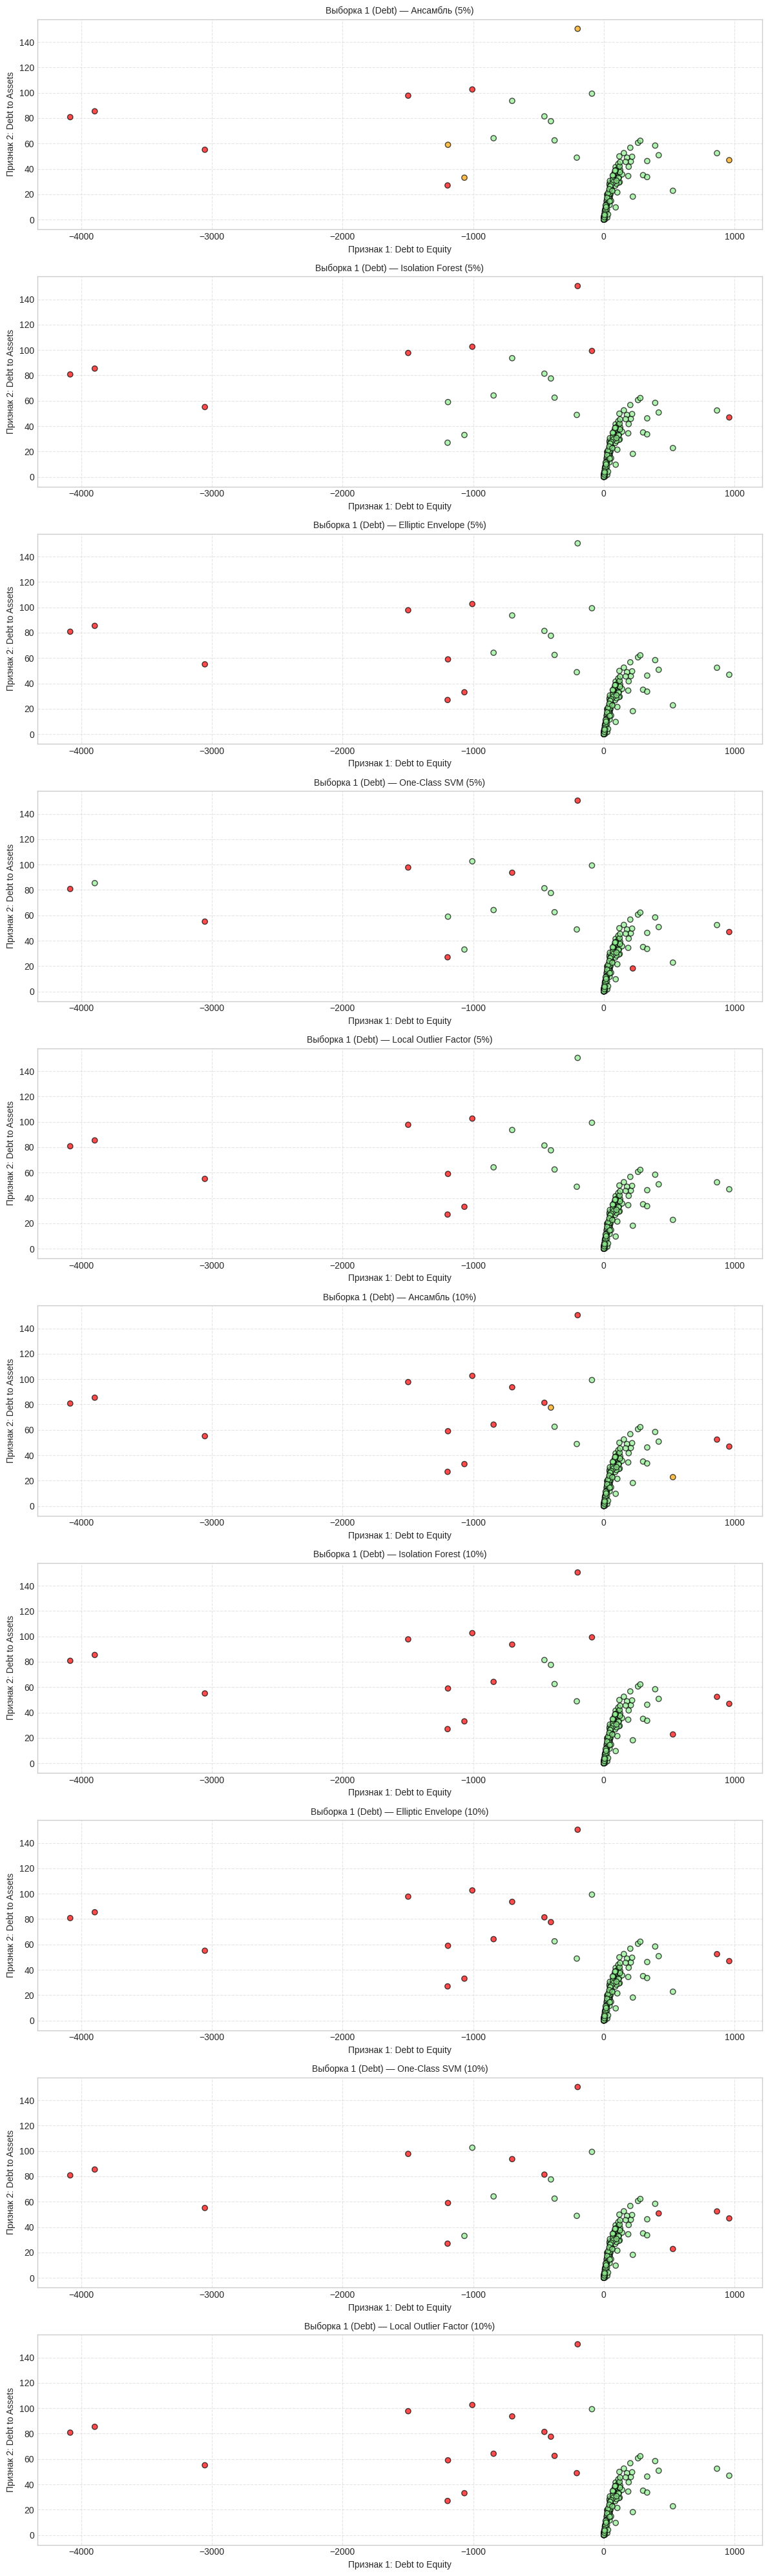

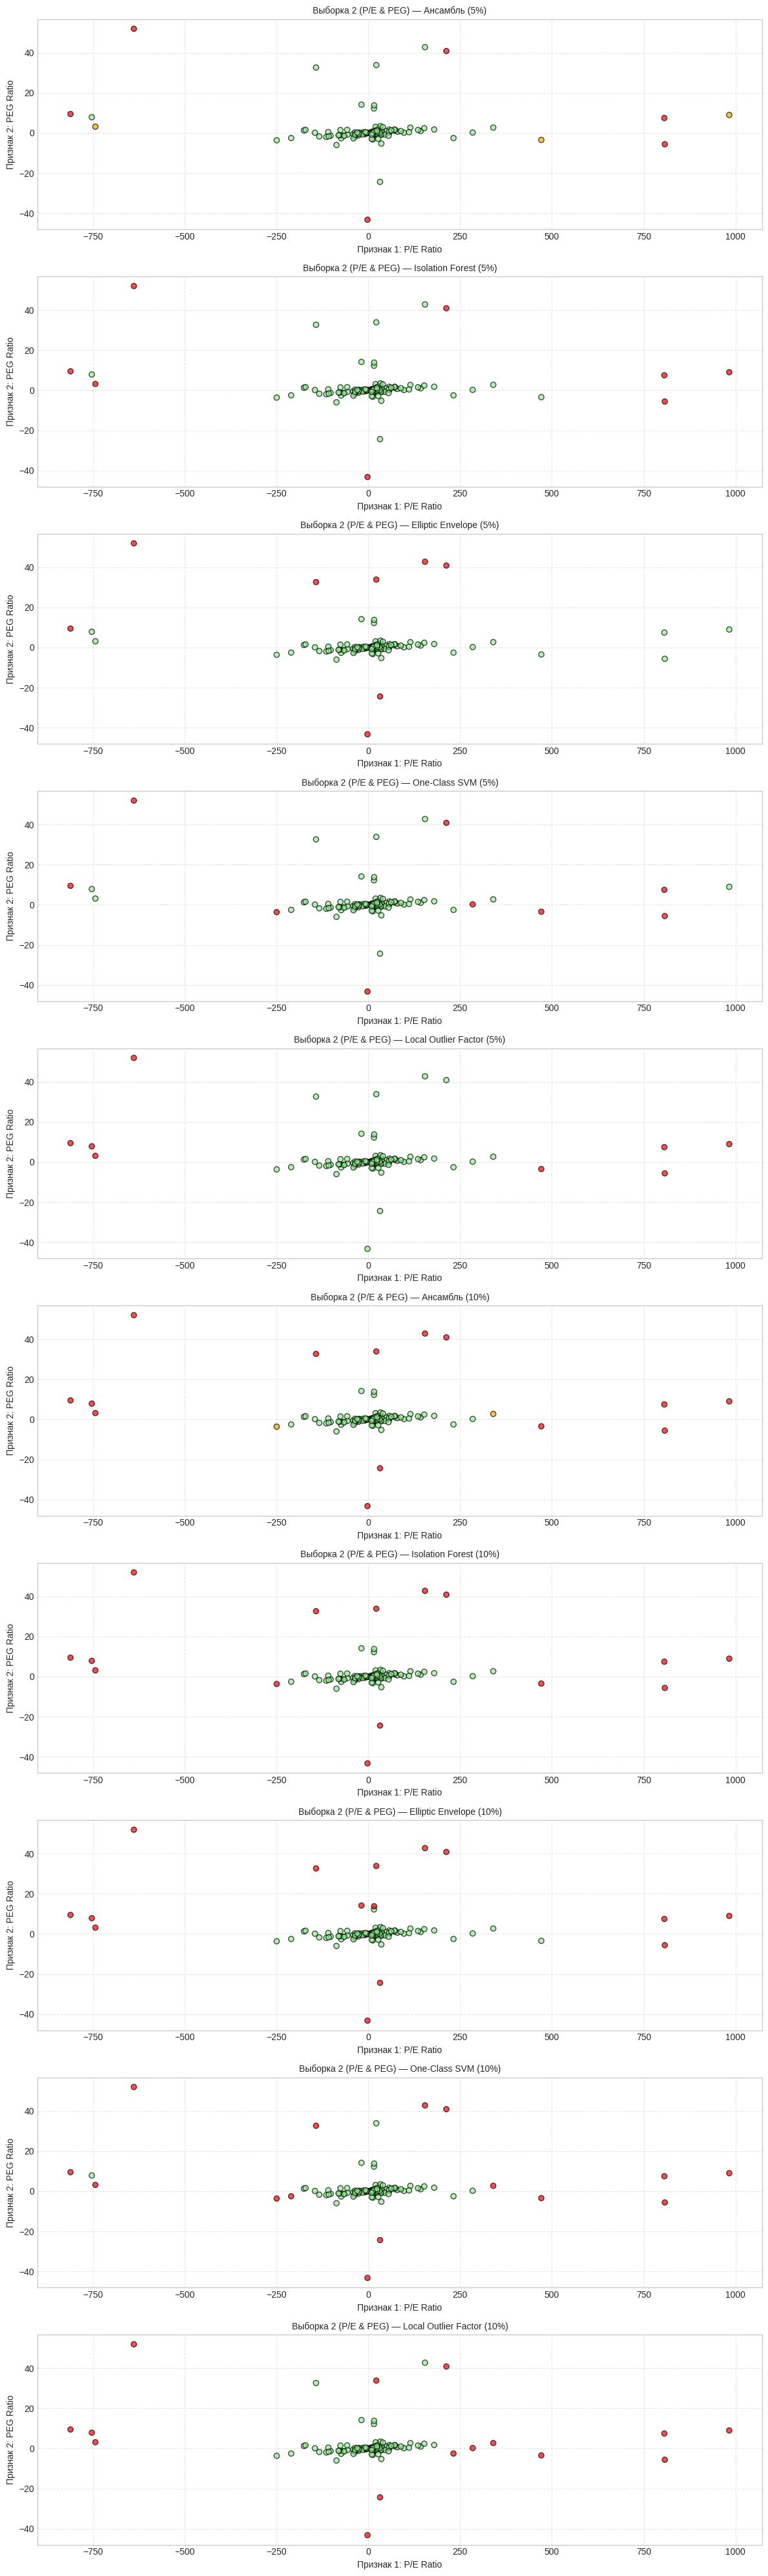

In [30]:
def plot_all_in_one_figure(results, name, feature_names):
    n = len(results)  # количество уровней contamination
    methods = list(next(iter(results.values()))['detectors'].keys())  # имена детекторов
    n_methods = len(methods)
    total_plots = n * (n_methods + 1)  # +1 для ансамбля

    plt.figure(figsize=(12, 4 * total_plots))  # общий размер фигуры

    plot_i = 1
    for cont, res in results.items():
        # Ансамбль
        ax = plt.subplot(total_plots, 1, plot_i)
        labels = res['ensemble_labels']
        color_map = {-1: 'red', 0: 'orange', 1: 'lightgreen'}
        colors_map = [color_map.get(l, 'gray') for l in labels]
        ax.scatter(res['X'][:, 0], res['X'][:, 1], c=colors_map, edgecolor='k', alpha=0.7)
        ax.set_title(f"{name} — Ансамбль ({int(cont*100)}%)", fontsize=10)
        ax.set_xlabel(f"Признак 1: {feature_names[0]}")
        ax.set_ylabel(f"Признак 2: {feature_names[1]}")
        ax.grid(True, linestyle='--', alpha=0.5)
        plot_i += 1

        # По отдельным методам
        for method in methods:
            ax = plt.subplot(total_plots, 1, plot_i)
            labels = res['detectors'][method]
            colors_map = [color_map.get(l, 'gray') for l in labels]
            ax.scatter(res['X'][:, 0], res['X'][:, 1], c=colors_map, edgecolor='k', alpha=0.7)
            ax.set_title(f"{name} — {method} ({int(cont*100)}%)", fontsize=10)
            ax.set_xlabel(f"Признак 1: {feature_names[0]}")
            ax.set_ylabel(f"Признак 2: {feature_names[1]}")
            ax.grid(True, linestyle='--', alpha=0.5)
            plot_i += 1

    plt.tight_layout()
    safe_title = re.sub(r'[^\w\s-]', '_', name)
    safe_title = re.sub(r'\s+', '_', safe_title)
    safe_title = safe_title.strip('_')
    plt.savefig(f"{safe_title}_all_methods.png", dpi=150)
    plt.show()

plot_all_in_one_figure(results_df1, df1.name, ['Debt to Equity', 'Debt to Assets'])
plot_all_in_one_figure(results_df2, df2.name, ['P/E Ratio', 'PEG Ratio'])